In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\El-
[nltk_data]     OrobY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 💬 Task 4: Sentiment Analysis – IMDB Movie Reviews

In this task, we perform sentiment analysis on a dataset of IMDB movie reviews.  
The goal is to classify reviews as Positive, Negative, or Neutral using NLP techniques and visualizations.


In [4]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Preprocess Text

In [5]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = re.sub(r'[^a-zA-Z ]', '', text)  # remove punctuation/numbers
    text = text.lower()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)


Apply Sentiment Analysis

In [6]:
def get_sentiment(text):
    analysis = TextBlob(text).sentiment.polarity
    if analysis > 0:
        return 'Positive'
    elif analysis < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['cleaned_review'].apply(get_sentiment)
df['Sentiment'].value_counts()


Sentiment
Positive    37812
Negative    12155
Neutral        33
Name: count, dtype: int64

C:\Users\El-OrobY\AppData\Local\Temp\ipykernel_17820\2292892636.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


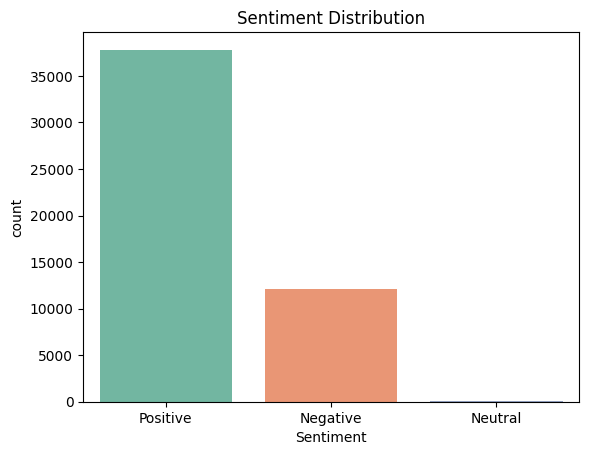

In [7]:
#Visualize Sentiment Distribution
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.show()


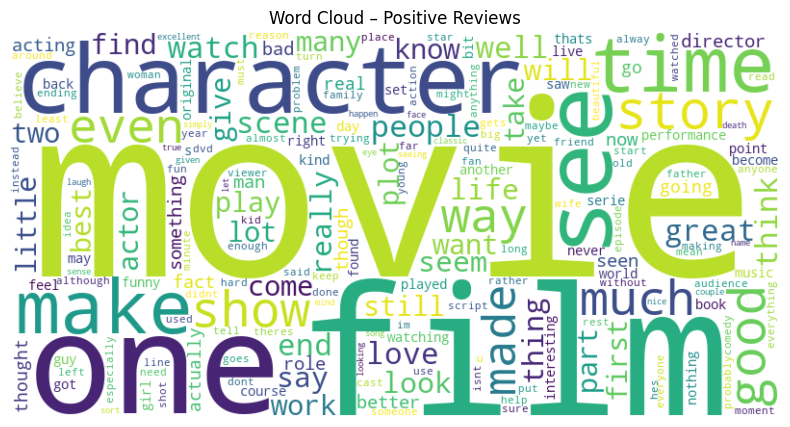

In [10]:
#Word Frequency / Word Cloud 
from wordcloud import WordCloud

text = ' '.join(df[df['Sentiment'] == 'Positive']['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Positive Reviews")
plt.show()


In [11]:
#Sample Sentences
df[df['Sentiment'] == 'Negative']['review'].sample(5)


26506    This is one of the most horrible 'scary' movie...
24571    Being S Club Seven, the film already boosts an...
7491     Before I saw this movie I believed there were ...
22000    OK, this has got 2 be one of the worst excuses...
8013     i am still not sure what the hell this movie i...
Name: review, dtype: object

## ✅ Conclusion

- Applied sentiment analysis using TextBlob on IMDB reviews
- Preprocessed text and classified each review
- Found that positive reviews dominate the dataset
- Visualized sentiment distribution and generated word clouds
